In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import special,integrate
import matplotlib.pyplot as plt
from mpmath import *
#myTalbot = calculus.inverselaplace.FixedTalbot(mp)
#myStehfest = calculus.inverselaplace.Stehfest(mp)
mydehoog = calculus.inverselaplace.deHoog(mp)

In [13]:
D=1.
R=0.01
C=R/D**0.5
kd = 4*np.pi*R*D
gamma=0.5772156
tm = R*R/D/4
kas = [kd*f for f in [0.1,10,100]]
print kas
print tm

[0.012566370614359175, 1.2566370614359172, 12.566370614359174]
2.5e-05


rel error of approximation at tm*100 -0.00381336879259
rel error of approximation at tm*100 -0.142018175477
rel error of approximation at tm*100 0.539268896596


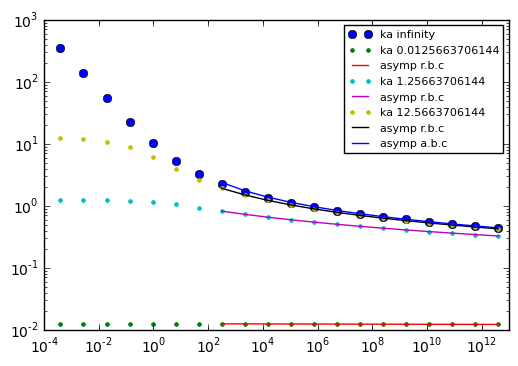

In [15]:
#inverse laplace transform of k(z) with absorbing b.c. and radiative b.c
mp.dps=10
mp.pretty=True
tt=np.logspace(-8,8,20)
#laplace domain form
kz = lambda z: 2*np.pi*D*complex(z)**0.5*C*special.kv(1,C*(complex(z)**0.5))/complex(z)/special.kv(0,C*(complex(z)**0.5))
kzck = lambda z: ka/(complex(z)+ka/kz(z))

def invlt(fp,t):    
    t = convert(t)
    #print t
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

kta = [invlt(kz,t) for t in tt]
plt.loglog(tt/tm,kta,'o',label='ka infinity')
#print kta

for ka in kas:
    ktck = [invlt(kzck,t) for t in tt]
    plt.loglog(tt/tm,ktck,'.',label='ka '+str(ka))
    tm100 = tt[tt>100*tm][0]    
    lpt = invlt(kzck,tm100)
    #print ka, ktck
    #long time asymptotic from ritchie and sakukura/yogurtcu
    ltck = lambda t:4*np.pi*D*(1./(np.log(4*D*t/R**2)-2*gamma+4*np.pi*D/ka)-gamma/(np.log(4*D*t/R**2)-2*gamma+4*np.pi*D/ka)**2
                          -1.311/(np.log(4*D*t/R**2)-2*gamma+4*np.pi*D/ka)**3+0.25/(np.log(4*D*t/R**2)-2*gamma+4*np.pi*D/ka)**4)
    plt.plot(tt[tt>tm*100]/tm,[ltck(t) for t in tt[tt>tm*100]],'-',label='asymp r.b.c')      
    lpa = ltck(tm100)
    print 'rel error of approximation at tm*100',(lpt-lpa)*100/lpt
    
    
    
lt = lambda t:2*np.pi*D*(2./(np.log(4*np.exp(-2*gamma)*D*t/R**2))-2*gamma/(np.log(4*np.exp(-2*gamma)*D*t/R**2))**2)
plt.plot(tt[tt>tm*100]/tm,[lt(t) for t in tt[tt>tm*100]],'-',label='asymp a.b.c')    
plt.legend(loc='best',fontsize=8)
#plt.xlim(10,1e11)
#plt.ylim(1e-3,1e-1)

In [32]:
print tt[-1]/tm
print (invlt(kzck,tt[-1])-ltck(tt[-1]))/invlt(kzck,tt[-1])
print (invlt(kzck,tt[-1])-lt(tt[-1]))/invlt(kzck,tt[-1])

4e+12
5.06979900258e-06
-0.0457810094479


In [33]:
tm100 = tt[tt>100*tm][0]
print (invlt(kzck,tm100)-ltck(tm100))/invlt(kzck,tm100)
print (invlt(kzck,tm100)-lt(tm100))/invlt(kzck,tm100)


0.00556199395235
-0.306091890978


In [36]:
[0.1,1]*10

[0.1,
 1,
 0.1,
 1,
 0.1,
 1,
 0.1,
 1,
 0.1,
 1,
 0.1,
 1,
 0.1,
 1,
 0.1,
 1,
 0.1,
 1,
 0.1,
 1]

In [4]:
def invlts(fp,t):    
    t = convert(t)
    #print t
    myStehfest.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in myStehfest.p]
    ft =(float(myStehfest.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft

def invltd(fp,t):    
    t = convert(t)
    #print t
    mydehoog.calc_laplace_parameter(t)
    fpvec = [fp(p) for p in mydehoog.p]
    ft =(float(mydehoog.calc_time_domain_solution(fpvec,t,manual_prec=False)))
    return ft